In [1]:
from __future__ import print_function

import sys
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/denoising-autoencoder/")
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/")

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.autograd import Variable
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

import autoencoder
import convnet

%matplotlib inline

## Autoencoder

In [3]:
trX, teX, trY, teY = convnet.load_mnist(onehot=False)
trX = np.array([x.flatten() for x in trX])
teX = np.array([x.flatten() for x in teX])
trX = Variable(torch.FloatTensor(trX))
teX = Variable(torch.FloatTensor(teX))

N = 60000
d_in = 784
d_out = 500
dtype = torch.FloatTensor
batch_size = 64
corruption = 0.5

ae = autoencoder.Autoencoder(n_visible=d_in, n_hidden=d_out,batch_size=batch_size)

optimizer = torch.optim.SGD(ae.parameters(), lr=0.01)
epochs = 30

In [4]:
ae.train_ae(trX, optimizer, epochs, corruption=0.2)

Epoch: 0 cost: 109.499534607
Epoch: 1 cost: 86.3237915039
Epoch: 2 cost: 80.7382049561
Epoch: 3 cost: 77.7013778687
Epoch: 4 cost: 75.7019424438
Epoch: 5 cost: 74.2881469727
Epoch: 6 cost: 73.2438430786
Epoch: 7 cost: 72.4019470215
Epoch: 8 cost: 71.7265777588
Epoch: 9 cost: 71.1585998535
Epoch: 10 cost: 70.7146987915
Epoch: 11 cost: 70.2691650391
Epoch: 12 cost: 69.9386749268
Epoch: 13 cost: 69.6318359375
Epoch: 14 cost: 69.3652191162
Epoch: 15 cost: 69.1296463013
Epoch: 16 cost: 68.9290084839
Epoch: 17 cost: 68.7258758545
Epoch: 18 cost: 68.5551147461
Epoch: 19 cost: 68.3739318848
Epoch: 20 cost: 68.1829376221
Epoch: 21 cost: 68.0770187378
Epoch: 22 cost: 67.9394454956
Epoch: 23 cost: 67.8137207031
Epoch: 24 cost: 67.7079162598
Epoch: 25 cost: 67.5806884766
Epoch: 26 cost: 67.4604644775
Epoch: 27 cost: 67.3851089478
Epoch: 28 cost: 67.2397689819
Epoch: 29 cost: 67.1606292725


## Visualizing Reconstructed Input

In [5]:
bX = teX[:64]
t = ae.encode(bX)
t2 = ae.decode(t)
ind = 25
temp = bX[ind].data.clone()
temp2 = ae.corrupt(Variable(temp), corruption)

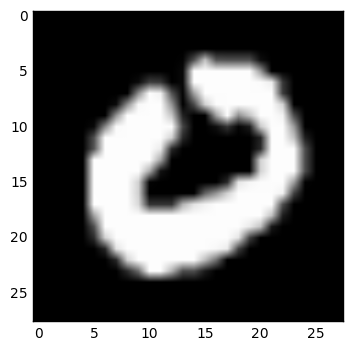

In [6]:
plt.imshow(temp.numpy().reshape(28, 28), cmap='gray')

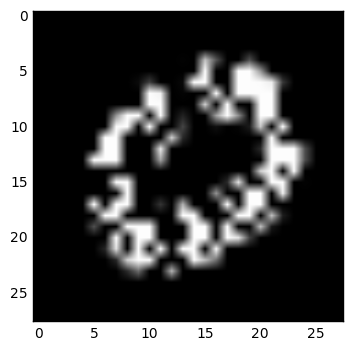

In [7]:
plt.imshow(temp2.data.numpy().reshape(28, 28), cmap='gray')

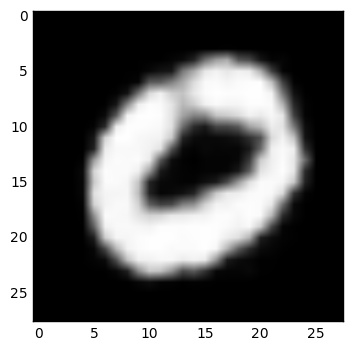

In [8]:
plt.imshow(t2[ind].data.numpy().reshape(28, 28), cmap='gray')